In [1]:
# Problem 3.13, P.75 of A first course of FEM

In [2]:
from fenics import *
import numpy as np

In [8]:
# Create mesh and define function space
# IntervalMesh(nx, a, b)
# nx (int) The number of cells, a (float) The minimum point (inclusive), b (float) The maximum point (inclusive).
mesh = IntervalMesh(3000, 0, 1)


In [9]:
V = FunctionSpace(mesh, "P", 2)
f = Expression("x[0]", degree=1)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

In [10]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = -Expression("x[0]", degree=1) * dot(grad(v), grad(u))*dx
L = v * f * dx

In [11]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

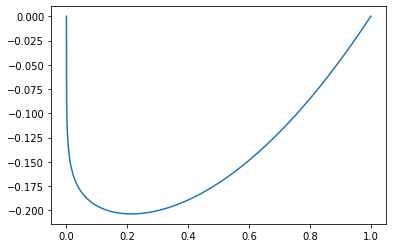

In [12]:
plot(u)